# Interactive Monte Carlo Tree Search (MCTS)

In [ ]:
%load_ext autoreload
%autoreload 2

In [439]:
from maMDP.agents import Agent
from maMDP.mdp import SquareGridMDP, MDP
from maMDP.environments import Environment
from maMDP.algorithms.action_selection import SoftmaxActionSelector, MaxActionSelector
from maMDP.algorithms.mcts import MCTS
from maMDP.algorithms.dynamic_programming import ValueIteration
import numpy as np
import matplotlib.pyplot as plt

## Create an environment

Here we create an environment with two active agents.

We can again use MCTS to determine best actions for our agent, but this time we can allow the MCTS algorithm to also account for the behaviour of other agents in the environments in its simulations. For example, in this example the second agent will eat the first one if they end up in the same state, so the first may want to account for the other agent's behaviour when planning to minimise the likelihood of being eaten. We can achieve this by setting the `interactive` argument to `True` when setting up the MCTS algorithm.

To do this, we have to determine best actions for the other agent so that we can predict its behaviour and use this for the simulations used by MCTS. This is done using value iteration, which can be fairly computationally intensive as we have to do it on each step of the simulation, for as many iterations as we want to run. To speed this up, we can cache the results so that the simulated agent will reuse previously computed Q values for its current state. To do this, we set the `caching` argument to True.

For the sake of quick demonstration, we'll set the number of iterations to a low number (30).

In [749]:
new_agent1 = Agent('testAgent1', algorithm=MCTS, algorithm_kwargs={'interactive': False, 'n_iter': 100, 'caching': True})
new_agent2 = Agent('testAgent2')

grid_shape = (15, 15)
features = np.zeros((3, np.product(grid_shape)))
features[0, 220:] = 1
features[0, 205:210] = 1

features[1, np.random.randint(0, np.product(grid_shape), 30)] = 1

for i in range(3, 8):
    features[2, i*15:i*15+2] = 1


new_mdp = SquareGridMDP(shape=grid_shape, features=features.copy())

new_env = Environment(new_mdp, 
                      {
                          new_agent1: (2, [0, 1, 0, 0, 0], [1]),
                          new_agent2: (130, [0, 0, 1, 0.2, 0], [3])
                      })

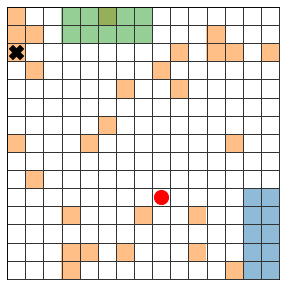

In [750]:
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})

The agent values the blue feature shown in the bottom right corner.

## Run MCTS

This will determine the best action from the current state, accounting for the other agent's actions.

The first time we run this, it can be quite slow.

In [535]:
%time new_env.fit('testAgent1')

Wall time: 3.99 ms


However, thanks to the cachine procedure it will be faster in subsequent runs:

In [409]:
%time new_env.fit('testAgent1')

Wall time: 487 ms


In [410]:
%time new_env.fit('testAgent1')

Wall time: 233 ms


## Run multiple steps

Here, Agent 1 values the orange feature on the map. Agent 2 values the green feature most (with a weight of 1) and values Agent 1 less (with a weight of 0.2). 

By accounting for Agent 2 in its planning, Agent 1 will know not to stray into the green area.

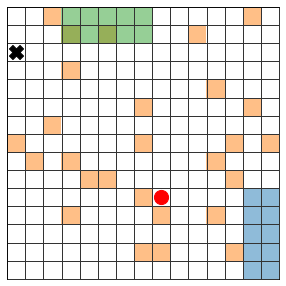

In [704]:
new_agent1 = Agent('testAgent1', algorithm=MCTS, 
                   algorithm_kwargs={'interactive': True, 
                                     'n_iter': 1000, 
                                     'caching': True,
                                     'C': 20})
new_env = Environment(new_mdp, 
                      {
                          new_agent1: (2, [0, 1, 0, 0, 0], [1]),
                          new_agent2: (130, [0, 0, 1, 0.2, 0], [3])
                      })

new_env.reset()
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})

C:\Users\tobyw\OneDrive-Caltech\maMDP\maMDP\algorithms\action_selection.py:75: RuntimeWarning: Mean of empty slice
  nan_states = np.isnan(np.nanmean(q_values, axis=1))
C:\Users\tobyw\OneDrive-Caltech\maMDP\maMDP\algorithms\action_selection.py:39: RuntimeWarning: Mean of empty slice
  nan_states = np.isnan(np.nanmean(q_values, axis=1))


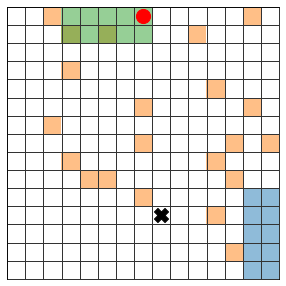

In [705]:
new_env.step_multi_interactive(n_steps=25, refit=True, progressbar=True)
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})

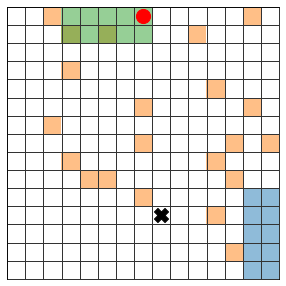

In [708]:
trajectory = new_env.get_agent_position_history('testAgent1')
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})
new_env.plot_trajectory(trajectory, ax)

## Non-interactive

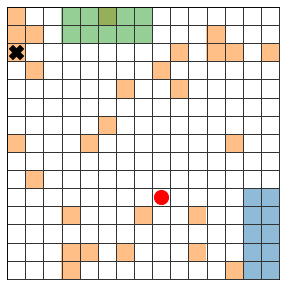

In [753]:
new_agent1 = Agent('testAgent1', algorithm=MCTS, 
                   algorithm_kwargs={'interactive': False, 
                                     'n_iter': 1000, 
                                     'caching': True,
                                     'C': 20})
new_mdp = SquareGridMDP(shape=grid_shape, features=features.copy())
new_env = Environment(new_mdp, 
                      {
                          new_agent1: (2, [0, 1, 0, 0, 0], [1]),
                          new_agent2: (130, [0, 0, 1, 0.2, 0], [3])
                      })

new_env.reset()
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})

In [752]:
new_env.step_multi_interactive(n_steps=25, refit=True, progressbar=True)
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})

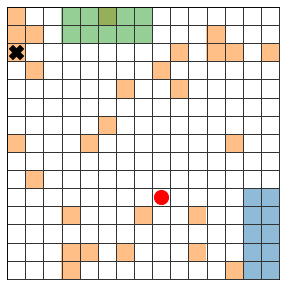

In [754]:
trajectory = new_env.get_agent_position_history('testAgent1')
new_env.plot(mdp_plotting_kwargs={'figsize': (15, 5)}, 
             agent_markers={'testAgent1': 'X', 'testAgent2': 'o'},
             agent_colours={'testAgent1': 'black', 'testAgent2': 'red'},
             agent_plotting_kwargs={'s': 200})
new_env.plot_trajectory(trajectory, ax)